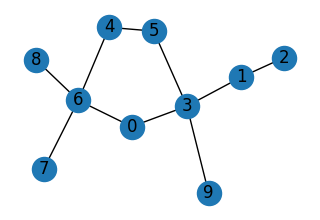

In [4]:
import networkx as nx
import matplotlib.pyplot as plt
G = nx.Graph()
G.add_nodes_from(list(range(10)))
G.add_edges_from([(1,2),(1,3), (3,0), (3,9),(4,5),(6,7), (3,5),(4,6),(6,0), (6,8)])
fig=plt.figure(figsize=(3,2))
#fig= plt.subplots(figsize=(6,4))
nx.draw(G, with_labels=True)

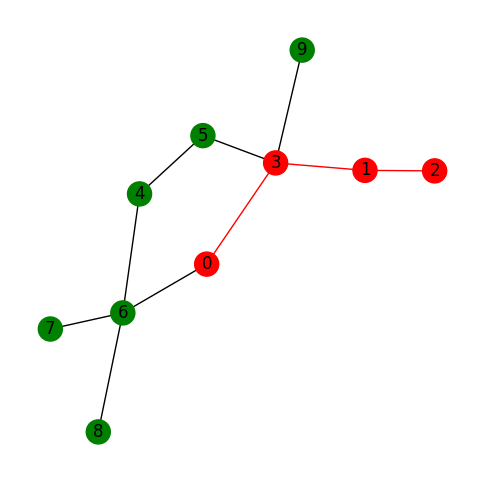

In [5]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.animation
def animarNodos(G, listaAnimacion, seed=123):
    size = len(nx.degree(G))
    fig, ax =plt.subplots(figsize=(6,6))
    color_map=["green"]*size
    pos= nx.spring_layout(G, seed=seed) 
    eSize = len(G.edges())
    edge_color= ["black"]*eSize
    le = [(u,v) for u,v in G.edges()]
    
    def update(i):
        ax.clear()
        v= listaAnimacion[i]
        if(len(v)==1):
            color_map[v[0]]="red"
        else:
            edge_color[le.index((v[0],v[1]))]="red"
        nx.draw(G,node_color=color_map, with_labels=True, pos=pos, edge_color=edge_color)
    ani = matplotlib.animation.FuncAnimation(fig, update, frames = len(listaAnimacion), interval=1000)
    return ani
 
animN = [[1],[1,2],[2],[1,3],[3],[0,3],[0]]
ani= animarNodos(G,animN)
from IPython.display import HTML
HTML(ani.to_jshtml())

In [21]:
import networkx as nx
import random
import matplotlib.pyplot as plt

def createRandomGraph(size, edgeProb, seed=123):
    G = nx.Graph()
    G.add_nodes_from(list(range(size)))
    random.seed(seed)
    graph = [[False]*size for _ in range(size)]

    for i in range(size):
        for j in range(i, size):
            if i == j or random.randint(0,100) > edgeProb:
                continue

            graph[i][j] = True
            graph[j][i] = True
            i1, i2 = [i,j] if  i < j else [j,i]

            G.add_edge(i1,i2)
    
    return graph, G

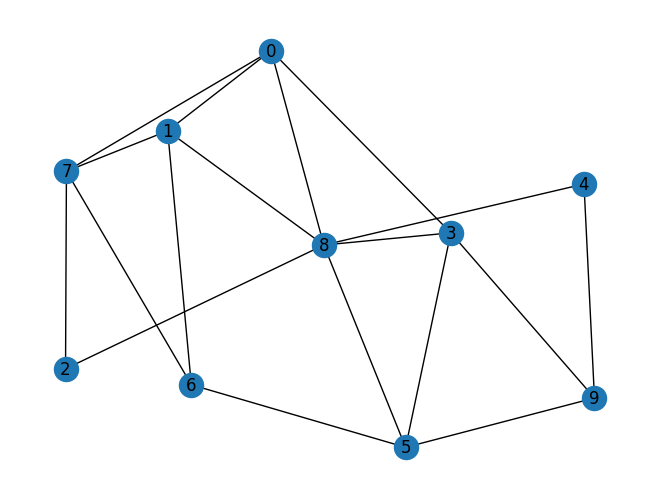

In [48]:
graph1, G1 = createRandomGraph(10, 20)
nx.draw(G1, with_labels=True)


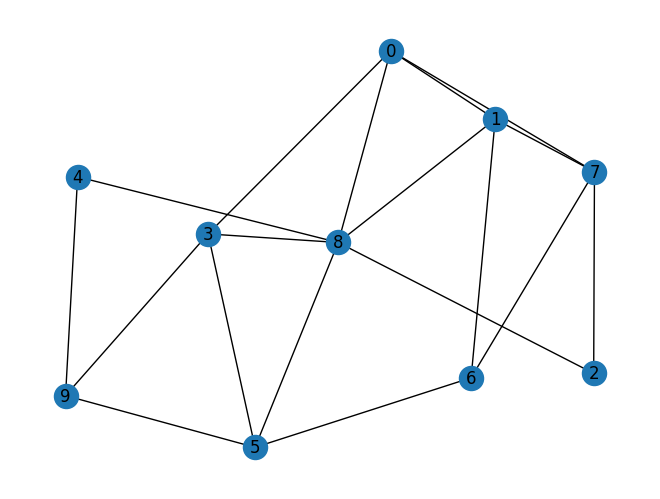

In [46]:
graph2, G2 = createRandomGraph(10, 25)
nx.draw(G2, with_labels=True)

In [39]:
graph1 == graph2
G1 == G2

False

In [12]:
arr = [[None]*10 for _ in range(10)]
arr[1][4] = 34
arr

[[None, None, None, None, None, None, None, None, None, None],
 [None, None, None, None, 34, None, None, None, None, None],
 [None, None, None, None, None, None, None, None, None, None],
 [None, None, None, None, None, None, None, None, None, None],
 [None, None, None, None, None, None, None, None, None, None],
 [None, None, None, None, None, None, None, None, None, None],
 [None, None, None, None, None, None, None, None, None, None],
 [None, None, None, None, None, None, None, None, None, None],
 [None, None, None, None, None, None, None, None, None, None],
 [None, None, None, None, None, None, None, None, None, None]]

In [ ]:
def graph_depth_first_search()

In [92]:
def DFS(graph, start, end):

    stack = [start]
    stackEdges = []
    anim = []
    size = len(graph)
    visited = [False]*size
    path = []

    while stack:
        current = stack.pop()
        
        if current == end:
            anim.append([current])
            path.append(current)
            print(anim)
            return True, path, anim
        
        if not visited[current]:
            visited[current] = True
            anim.append([current])
            path.append(current)

            for i in range(size):
                if graph[current][i] and not visited[i]:
                    stack.append(i)
                    i1, i2 = [i,current] if  i < current else [current,i]
                    stackEdges.append([i1,i2])
        if stackEdges:
            e = stackEdges.pop()
            anim.append(e)
                    
    
    return False, path, anim


        


[[6], [6, 7], [7], [2, 7], [2], [2, 8], [8], [5, 8], [5], [5, 9], [9], [4, 9], [4]]
True [6, 7, 2, 8, 5, 9, 4]


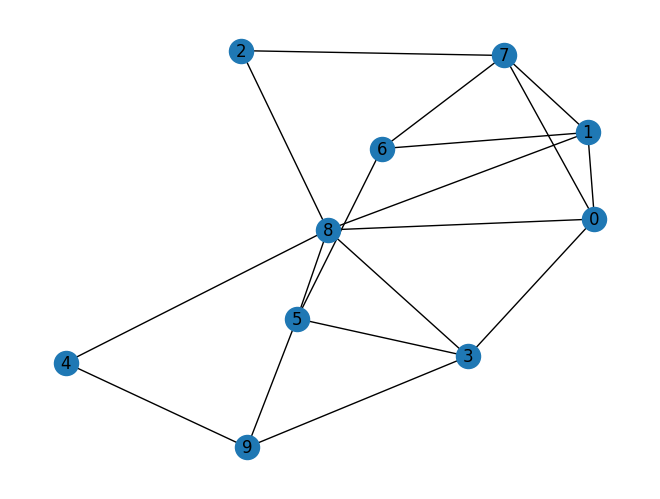

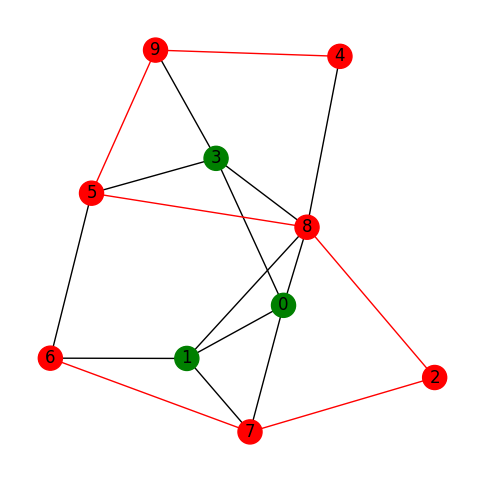

In [93]:
graph3, G3= createRandomGraph(10, 25)
nx.draw(G3, with_labels=True)
response, path, anim = DFS(graph3, 6, 4)
print(response, path)

ani = animarNodos(G3, anim)
from IPython.display import HTML
HTML(ani.to_jshtml())


In [82]:
def BFS(graph, start, end):

    stack = [start]
    stackEdges = []
    anim = []
    size = len(graph)
    visited = [False]*size
    path = []

    while stack:
        current = stack.pop(0)
        
        if current == end:
            anim.append([current])
            path.append(current)
            return True, path, anim
        
        if not visited[current]:
            visited[current] = True
            anim.append([current])
            path.append(current)

            for i in range(size):
                if graph[current][i] and not visited[i]:
                    stack.append(i)
    
    return False, path, anim

True [6, 1, 5, 7, 0, 8, 3, 9, 2, 4]


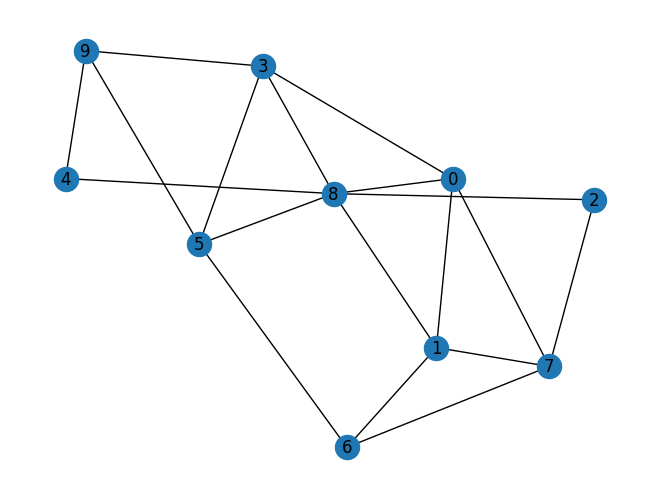

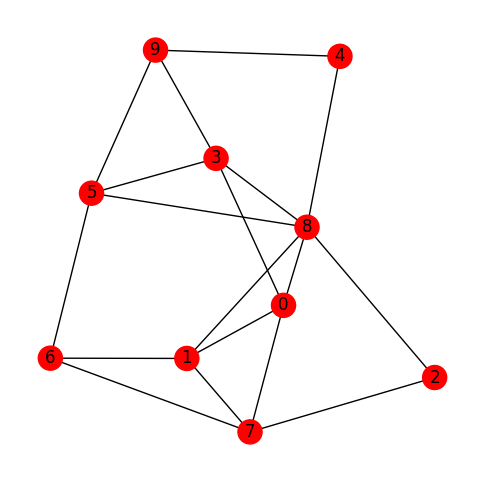

In [83]:
graph4, G4 = createRandomGraph(10, 25)
nx.draw(G4, with_labels=True)
response, path, anim = BFS(graph4, 6, 4)
print(response, path)

ani = animarNodos(G4, anim)
from IPython.display import HTML
HTML(ani.to_jshtml())
